## HD 2039

Radial velocity data for HD2039 were obtained from Tinney et al.(2003).


Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import RadialVelocityModel
from BayesicFitting import PolynomialModel
from BayesicFitting import CircularUniformPrior

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt



In [2]:
#%matplotlib osx

Read the data

In [2]:
tbl = ascii.read( "data/HD2039.dat" )
#print( tbl )
jd = tbl['JDa'].data
rv = tbl['RVa'].data
er = tbl['Uncertainty'].data


We define a radial velocity model. It has 5 parameters: amplitude, period, eccentricity, longitude of periastron, phase since periastron.
The phase parameters both get a CircularUniformPrior.
We need to add a constant for the systemic velocity of the system.

In [3]:
twopi = 2 * math.pi
rvm = RadialVelocityModel( )
lolim = [0.0, 1000.0, 0.0]
hilim = [200.0, 1500.0, 0.99]
rvm.setLimits( lowLimits=lolim, highLimits=hilim )
rvm.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl = pm + rvm
print( mdl )
print( mdl.npchain, mdl.npbase )
print( [mdl.getPrior(k).lowLimit for k in range( mdl.npchain )])



Polynomial: f( x:p ) = p_0 +
RadialVelocity 
6 1
[0.0, 0.0, 1000.0, 0.0, 0.0, 0.0]


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity 
Using a Gauss error distribution with with unknown scale
Moving the walkers with   GalileanEngine
Iteration   logZ        H     LowL     npar    parameters
       0 -3571791828.8      4.6 -3571791824.2      7  [   92.195   74.282 1094.188    0.806    1.665 ...]


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/BayesicFitting-1.0.4-py3.5.egg/BayesicFitting/source/FixedModel.py:362: UserWarning: RadialVelocity has no partials defined; using numeric partials.


     100 -21426.5      5.6 -21420.9      7  [  143.393   57.335 1433.680    0.824    6.263 ...]
     200   -733.7      6.6   -727.1      7  [  134.359  188.678 1149.172    0.736    0.953 ...]
     300   -272.6      7.1   -265.1      7  [  158.268   62.191 1031.888    0.825    1.070 ...]
     400   -211.9      6.4   -204.7      7  [   32.450   80.553 1407.688    0.394    1.544 ...]
     500   -197.6      6.2   -190.5      7  [   17.696   47.801 1171.774    0.711    0.761 ...]
     600   -191.5      6.6   -183.9      7  [   22.751   34.796 1014.000    0.249    2.014 ...]
     700   -185.9      7.9   -176.7      7  [    1.479   21.584 1069.258    0.358    0.941 ...]
     800   -180.9      8.2   -171.6      7  [   94.167   49.832 1270.904    0.768    3.953 ...]
     900   -176.8      9.3   -166.2      7  [   50.472   73.750 1323.641    0.277    4.331 ...]
    1000   -171.6     10.2   -160.5      7  [   21.441   51.461 1355.678    0.315    4.888 ...]
    1100   -168.8     10.8   -156.6     

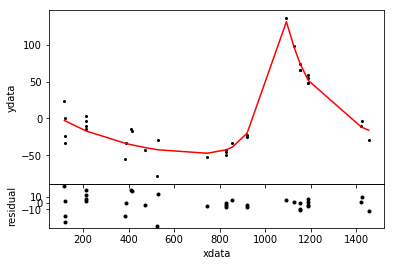

In [4]:
# define NestedSampler
ns = NestedSampler( jd, mdl, rv, seed=1308 )
ns.verbose = 2
# set limits on the noise scale of the distribution
ns.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi = ns.sample( plot=True )

# RadialVelocityModel has no partial. Numeric partials are used in stead.

In [12]:
sl = ns.samples
par = sl.parameters
std = sl.stdevs
print( fmt( par, max=None ) )
print( fmt( std, max=None ) )
print( fmt( sl.scale ), fmt( sl.stdevScale ) )
print( evi )

[  125.112  109.206 1249.702    0.646    4.187    2.692]
[   27.984   17.253   22.173    0.033    0.133    0.068]
   14.689     0.319
-67.43354322166485


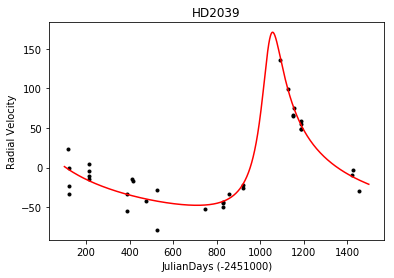

In [7]:
plt.plot( jd, rv, 'k. ' )
xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, par ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.show()